In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [10]:

df = pd.read_excel('/Users/shubhrasaxena/Downloads/mediclaim data.xlsx')
df


,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


# Exploratory data analysis


In [5]:

print(df.describe())


          children          age          bmi  charges in INR
count  1338.000000  1338.000000  1338.000000     1338.000000
mean      1.094918    39.207025    30.663397    13270.422265
std       1.205493    14.049960     6.098187    12110.011237
min       0.000000    18.000000    15.960000     1121.873900
25%       0.000000    27.000000    26.296250     4740.287150
50%       1.000000    39.000000    30.400000     9382.033000
75%       2.000000    51.000000    34.693750    16639.912515
max       5.000000    64.000000    53.130000    63770.428010


In [6]:
# Check for missing values
print(df.isnull().sum())

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64


In [7]:
# Check data types and non-null counts
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
None


In [8]:
df.duplicated().sum()

0

In [9]:
average_spent_per_policy = df["charges in INR"].mean()
print(average_spent_per_policy)

13270.422265141257


In [10]:
df_model = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'], dtype = "int64")

In [11]:
df_model = df_model.drop(['Policy no.', 'sex_female', 'smoker_no'], axis=1)
df_model.rename(columns = {'sex_male':'sex', 'smoker_yes':'smoker'}, inplace = True)  


<Axes: >

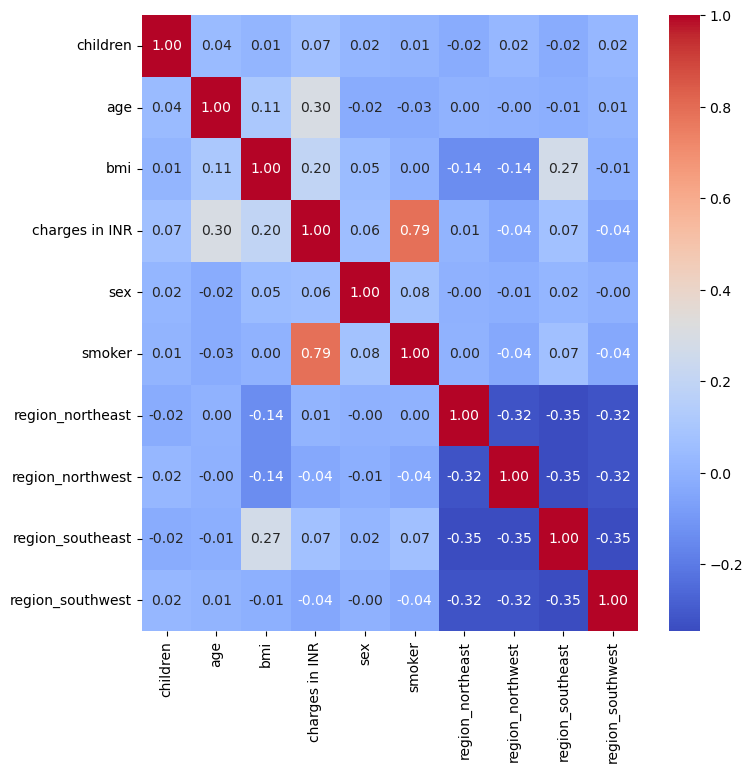

In [12]:
df_corr = df_model.corr()

plt.figure(figsize = (8,8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm" )

### There is strong correlation between smoker and charges.

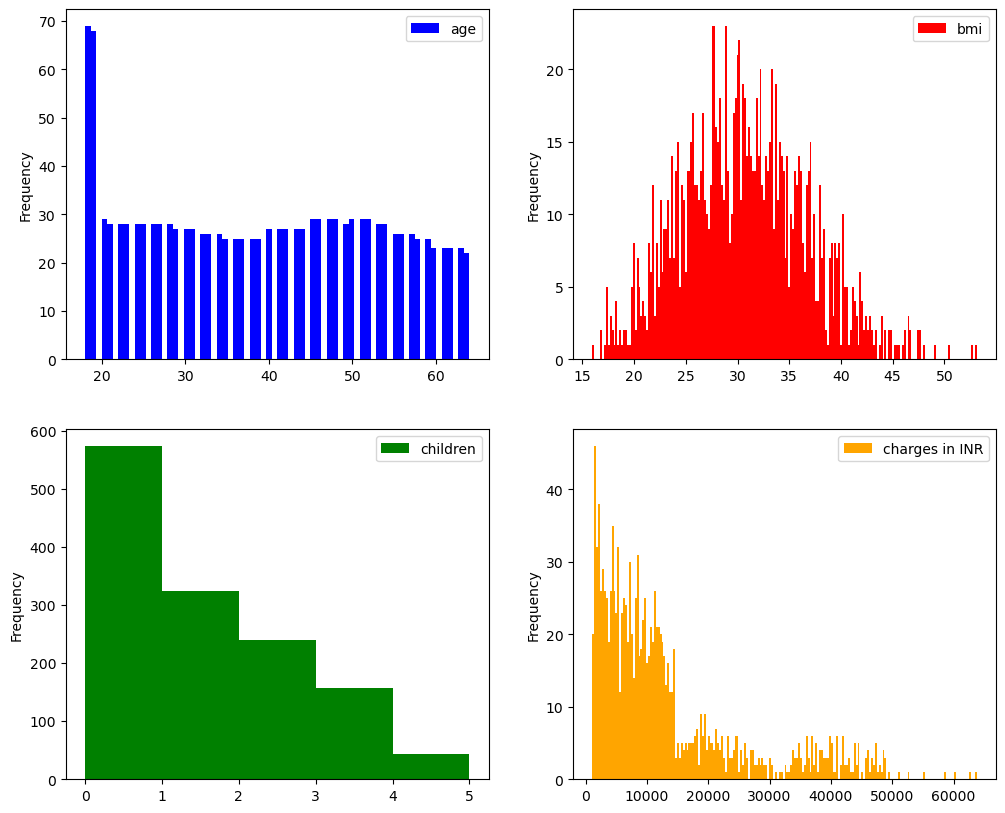

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=200, color="r", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=5, color="g", ax=axes[1][0])
df.plot(kind="hist", y="charges in INR", bins=200, color="orange", ax=axes[1][1])

plt.show()

### These plots shows that the number of children who have no children in the dataset is more than the others. In addition, the total charge amount usually looks less than 20000. Now look at the male and female numbers in dataset:

In [14]:
sex = df["sex"].value_counts().reset_index()
sex

,index,sex
0,male,676
1,female,662


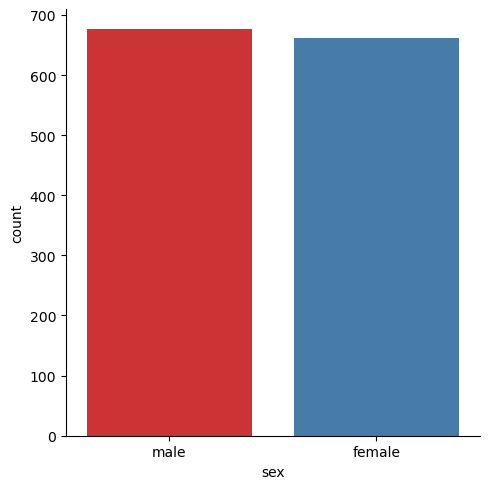

In [15]:
sns.catplot(x="sex", kind="count", palette="Set1", data=df)

In [16]:
df[df['bmi']>=50]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
449,PLC164521,1,no,southeast,23,male,50.38,2438.0552
535,PLC168751,0,no,southeast,18,male,53.13,1163.4627
1192,PLC166321,1,yes,southeast,22,male,52.58,44501.3982


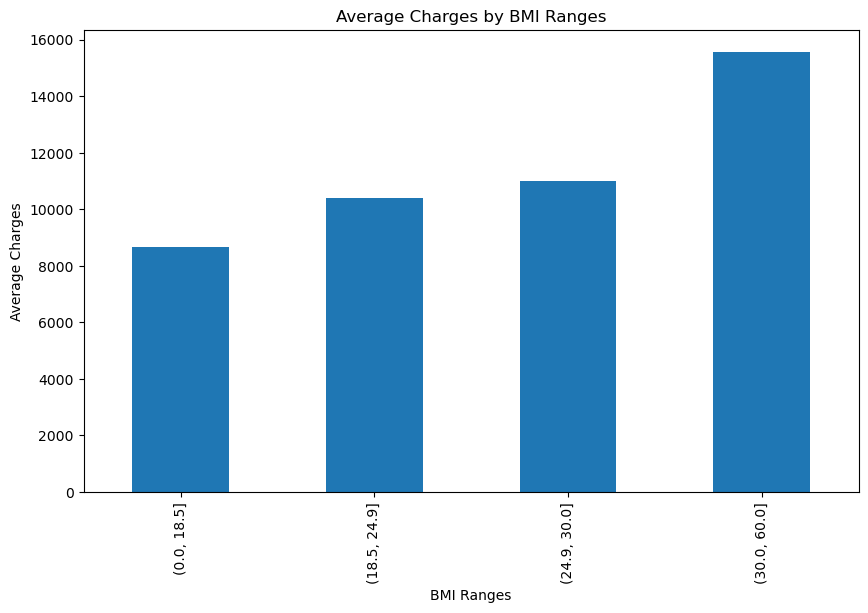

In [17]:
# Bar plot of the average charges for different BMI ranges
bmi_ranges = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 30, 60])
avg_charges_by_bmi_ranges = df.groupby(bmi_ranges)['charges in INR'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_bmi_ranges.plot(kind='bar')
plt.xlabel('BMI Ranges')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI Ranges')
plt.show()

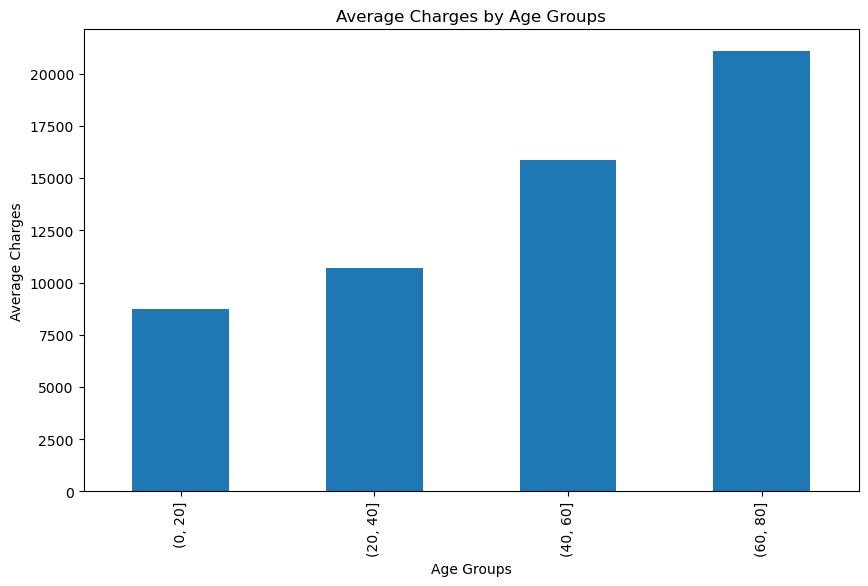

In [18]:
age_groups = pd.cut(df['age'], bins=[0, 20, 40, 60, 80])
avg_charges_by_age_groups = df.groupby(age_groups)['charges in INR'].mean()
plt.figure(figsize=(10, 6))
avg_charges_by_age_groups.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age Groups')
plt.show()

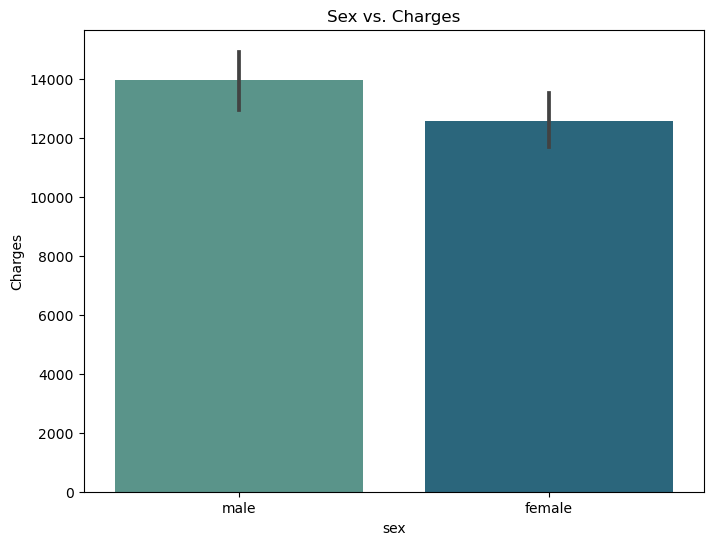

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges in INR', palette = 'crest')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.title('Sex vs. Charges')
plt.show()

### The plot shows region wise males are charged slightly higher than females.

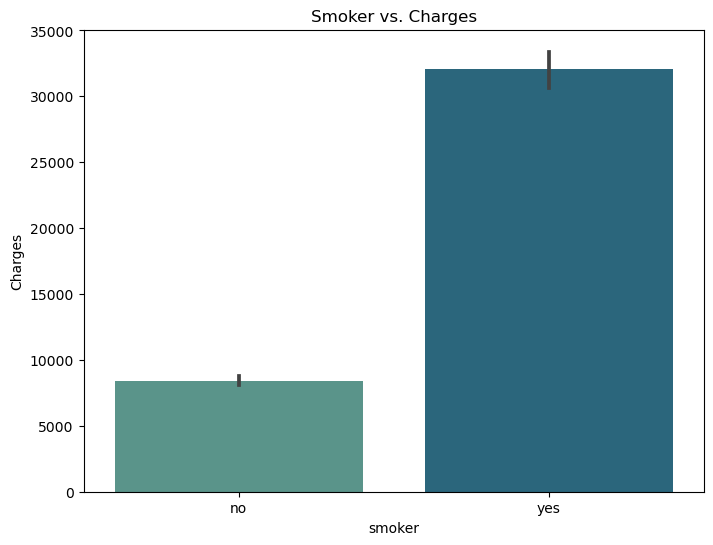

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges in INR', palette = 'crest')
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

### Smoking has the highest impact on the medical insurance costs. 

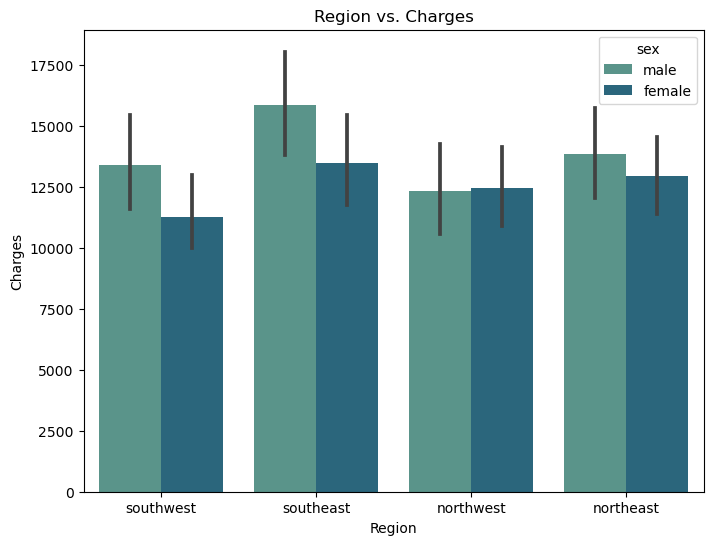

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges in INR', hue='sex', palette = 'crest')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

### The plot shows that southeast region has higher charges overall.

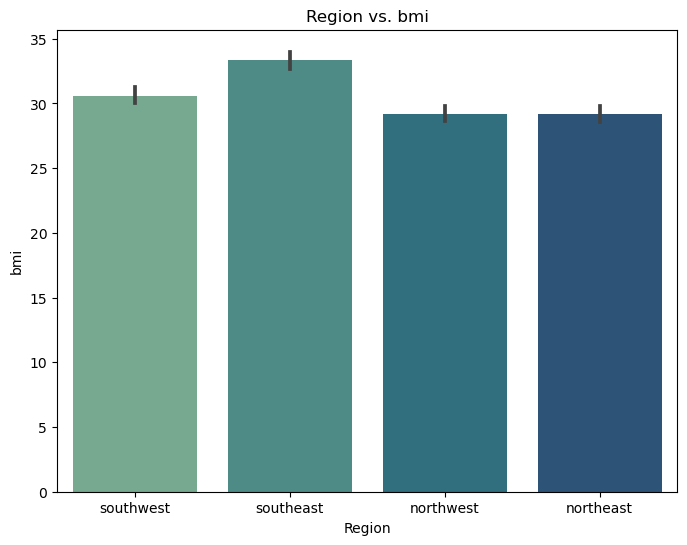

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='bmi', palette = 'crest')
plt.xlabel('Region')
plt.ylabel('bmi')
plt.title('Region vs. bmi')
plt.show()

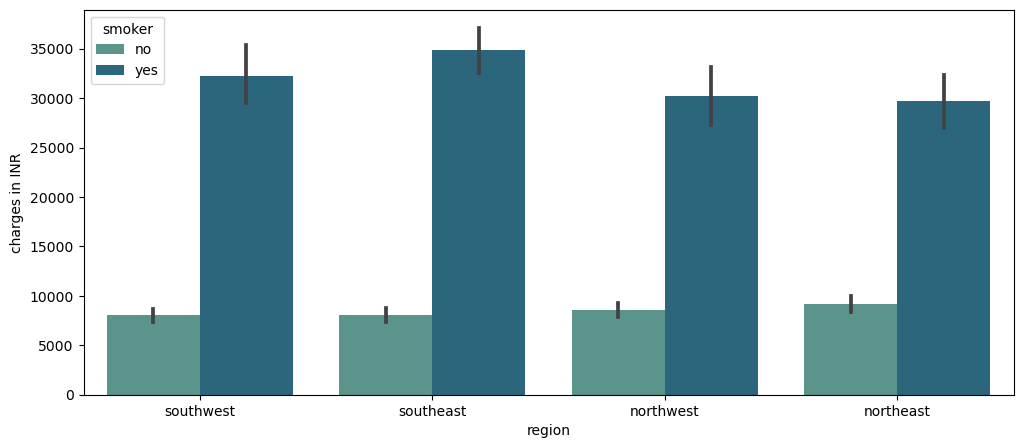

In [23]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df,x='region',y='charges in INR',hue='smoker',palette = 'crest')

### Number of males with smoking habits are more in southeast region.

Text(0.5, 1.0, 'Regions With Oldest People')

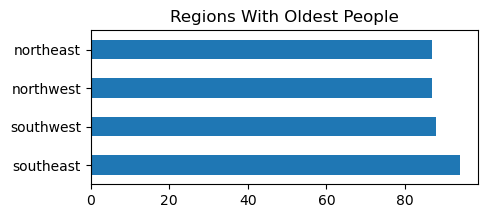

In [24]:
ax = df[df['age']>50]['region'].value_counts().plot.barh(figsize=(5,2))
plt.title('Regions With Oldest People')

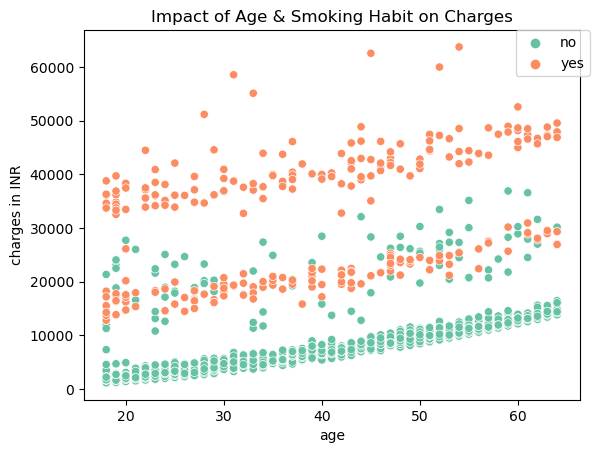

In [25]:
sns.scatterplot(x='age', y='charges in INR', hue='smoker', palette="Set2", data=df).set(title='Impact of Age & Smoking Habit on Charges')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()


### This plot also indicates that as the age of the insured person increases, the insurance charges tend to increase as well.



Text(0.5, 1.0, 'BMI vs Medical Charges')

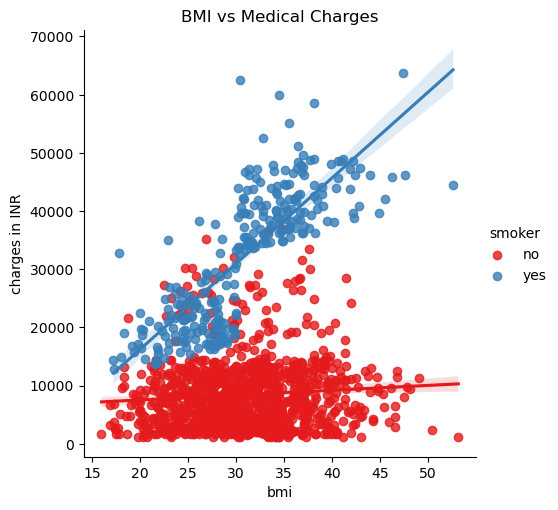

In [26]:
sns.lmplot(x = 'bmi', y = 'charges in INR', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')


# For smokers higher bmi clearly coincides with higher medical costs.

Text(0.5, 1.0, 'BMI vs Medical Charges')

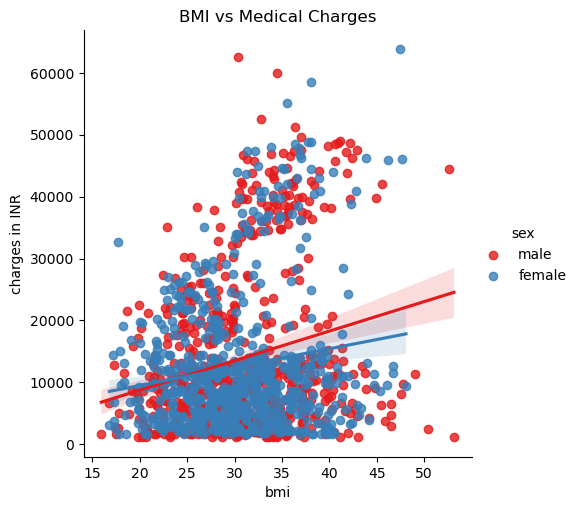

In [27]:
sns.lmplot(x = 'bmi', y = 'charges in INR', data = df, hue = 'sex', palette = 'Set1')
plt.title('BMI vs Medical Charges')


In [28]:
children = df['children'].value_counts()
children

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

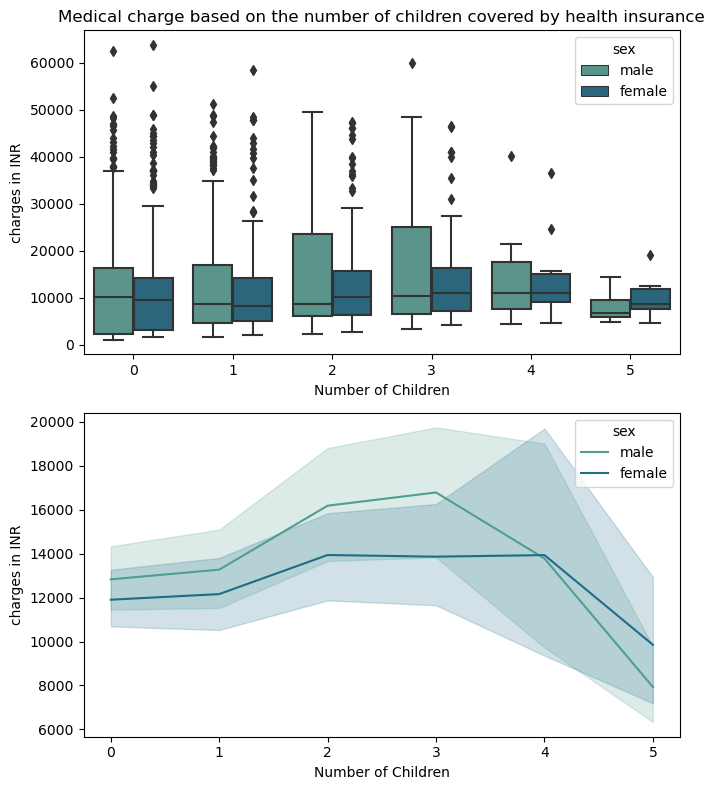

In [29]:
fig, axes = plt.subplots(2, 1, figsize = (7,8))
sns.boxplot(data=df, x='children', y='charges in INR', hue='sex', ax = axes[0],palette = 'crest')
axes[0].set_title("Medical charge based on the number of children covered by health insurance")
axes[0].set_xlabel("Number of Children")

sns.lineplot(data=df, x='children', y='charges in INR', hue='sex', ax = axes[1], palette = 'crest')
axes[1].set_xlabel("Number of Children")

plt.tight_layout()
plt.show()


### This plot depicts that when individuals have 3 children, they tend to have the most average medical bills compared to others. The female applicants who have less than 4 children, tend to have less medical bills than the male applicants when they have or don't have children as dependents

### FEATURE ENGINEERING

In [30]:
df1 = df.copy()

In [31]:
df1['sex'].unique()
df1['sex']=df['sex'].map({'female':0,'male':1})
df1['smoker']=df['smoker'].map({'yes':1,'no':0})
df1['region']=df['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [32]:

df1

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,0,1,23,1,34.400,1826.84300
1,PLC157033,1,0,1,19,1,24.600,1837.23700
2,PLC157060,0,0,1,56,1,40.300,10602.38500
3,PLC157087,1,0,1,30,0,32.400,4149.73600
4,PLC157186,5,0,1,19,0,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,1,4,39,1,29.925,22462.04375
1334,PLC168436,0,1,4,18,0,21.660,14283.45940
1335,PLC168634,2,1,4,42,1,24.605,21259.37795
1336,PLC168652,0,1,4,29,0,21.850,16115.30450


In [33]:
# Independent 
df2 = df1.drop(['Policy no.'], axis = 1)
df2

,children,smoker,region,age,sex,bmi,charges in INR
0,0,0,1,23,1,34.400,1826.84300
1,1,0,1,19,1,24.600,1837.23700
2,0,0,1,56,1,40.300,10602.38500
3,1,0,1,30,0,32.400,4149.73600
4,5,0,1,19,0,28.600,4687.79700
...,...,...,...,...,...,...,...
1333,1,1,4,39,1,29.925,22462.04375
1334,0,1,4,18,0,21.660,14283.45940
1335,2,1,4,42,1,24.605,21259.37795
1336,0,1,4,29,0,21.850,16115.30450


In [34]:
# Independent 
x = df2.drop(['charges in INR'], axis = 1)
print(x.shape)
print(x.columns)



(1338, 6)
Index(['children', 'smoker', 'region', 'age', 'sex', 'bmi'], dtype='object')


In [35]:
# Dependent
y = df2['charges in INR']

# MACHINE LEARNING MODEL

### LINEAR REGRESSION

In [36]:
# PREAPRING DATA BY SPLITTING INTO TRAINING AND TESTING DATA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Size of x_train = ', x_train.shape)
print('Size of x_test  = ', x_test.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_test  = ', y_test.shape)


Size of x_train =  (1070, 6)
Size of x_test  =  (268, 6)
Size of y_train =  (1070,)
Size of y_test  =  (268,)


In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [39]:
# model accuracy 

lr_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(lr_r2_score, 3))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))
# Model Score
print('\nModel Accuracy Score:', (model.score(x_test, y_test))*100)

R square Score =  0.746
Root Mean Squared Error =  6526.723

Model Accuracy Score: 74.57998692177111


### This shows that this model will gain accuracy around 74.6%

### RANDOM FOREST REGRESSOR

In [40]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_predict_rf = rf_model.predict(x_test)

In [41]:
# model accuracy 

rf_r2_score = r2_score(y_test, y_predict_rf)
print('R square Score = ', round(rf_r2_score, 3))

rf_mse = mean_squared_error(y_test, y_predict_rf)
rf_rmse = np.sqrt(rf_mse)
print('Root Mean Squared Error = ', round(rf_rmse, 3))
# Model Score
print('\nModel Accuracy Score:', (rf_model.score(x_test, y_test))*100)

R square Score =  0.828
Root Mean Squared Error =  5368.961

Model Accuracy Score: 82.79851500476427


### This shows that this model will gain accuracy around 83.3%

### GRADIENT BOOSTING REGRESSOR

In [42]:
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =0.1)
gb_model.fit(x_train, y_train)

y_predict_gb = gb_model.predict(x_test)

In [43]:
# model accuracy 
 
gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))
# Model Score
print('\nModel Accuracy Score:', (gb_model.score(x_test, y_test))*100)

Root Mean Squared Error =  4897.359
R square Score =  0.857

Model Accuracy Score: 85.68770120455224


### This model will gain accuracy around 85.7% which is highest amongst all.

In [76]:
# We can create a new DataFrame with data from a new patient, on which we will use the
# gradient booster model to predict the expected charges

new_data = {'age':40,
       'sex':1,
       'bmi':35,
       'children':2,
       'smoker':1,
       'region':1}

new_patient = pd.DataFrame(new_data, index = [0])
print(new_patient)

   age  sex  bmi  children  smoker  region
0   40    1   35         2       1       1


In [79]:
# predict charges on new data

new_predict = gb_model.predict(new_patient)
print("Medical Insurance cost for New Customer is : ",new_predict[0])

Medical Insurance cost for New Customer is :  63521.30316055329


### HYPERTUNING PARAMETERS IN GRADIENT BOOSTING REGRESSOR

In [46]:
gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.1,0.5,1,10,100]
}

In [47]:
random_search_gb = RandomizedSearchCV(estimator = gbr,  param_distributions = parameters, verbose = 1, cv = 5, n_iter = 100, random_state = 42)

random_search_gb.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.5, 1, 10, 100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   random_state=42, verbose=1)

In [48]:
print(f'best: {random_search_gb.best_params_}')

best: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [49]:
gb_rs = GradientBoostingRegressor(n_estimators = 50, max_depth = 3, learning_rate = 0.1)

model_gb_rs = gb_rs.fit(x_train, y_train)

y_pred_gb_rs = model_gb_rs.predict(x_test)


In [50]:

# Model Score
print('\nModel Accuracy Score:', (gb_rs.score(x_test, y_test))*100)


Model Accuracy Score: 85.7913071888935


# Thee accuracy score increases by 0.11%

In [80]:
# Let us predict charges on new data with improved accuracy

new_predict = gb_rs.predict(new_patient)
print("Medical Insurance cost for New Customer is : ",new_predict[0])

Medical Insurance cost for New Customer is :  52127.16364834624
